* # VAMOS A HACER UN ANÁLISIS GENERAL Y EXPLORATORIO SOBRE UN BANCO.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
### Carga de datos
data = pd.read_csv("./bank-full.csv", sep=";")
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


* Contenemos 45211 datos, es decir "Usuarios". son valores numericos y descriptivos.
* El DataSet tiene un tamaño de 6MB
* Podemos aprovechar que tenemos un DataSet grande y con muchos datos a hacer unas predicciones buenas.
* Estan todos los nombres en "Ingles" y habria que cambiarlo al castellano
---

* ### Cambio de nombre a las columnas del DataSet

In [4]:
data = data.rename(columns={"age":"edad" , "job":"trabajo","marital":"estado_civil","education":"educacion",
                            "default":"incumplimiento_de_pago","balance":"saldo_actual","housing":"hipoteca_prestamo","loan":"prestamo",
                            "contact":"contacto","day":"dia","month":"mes","duration":"duracion_ult_llamada","campaign":"campaña",
                            "pdays":"dias_ult_contacto","previous":"contacto_previo","poutcome":"campaña_anterior"})

----
* # Grafica de los datos (Descriptivos)

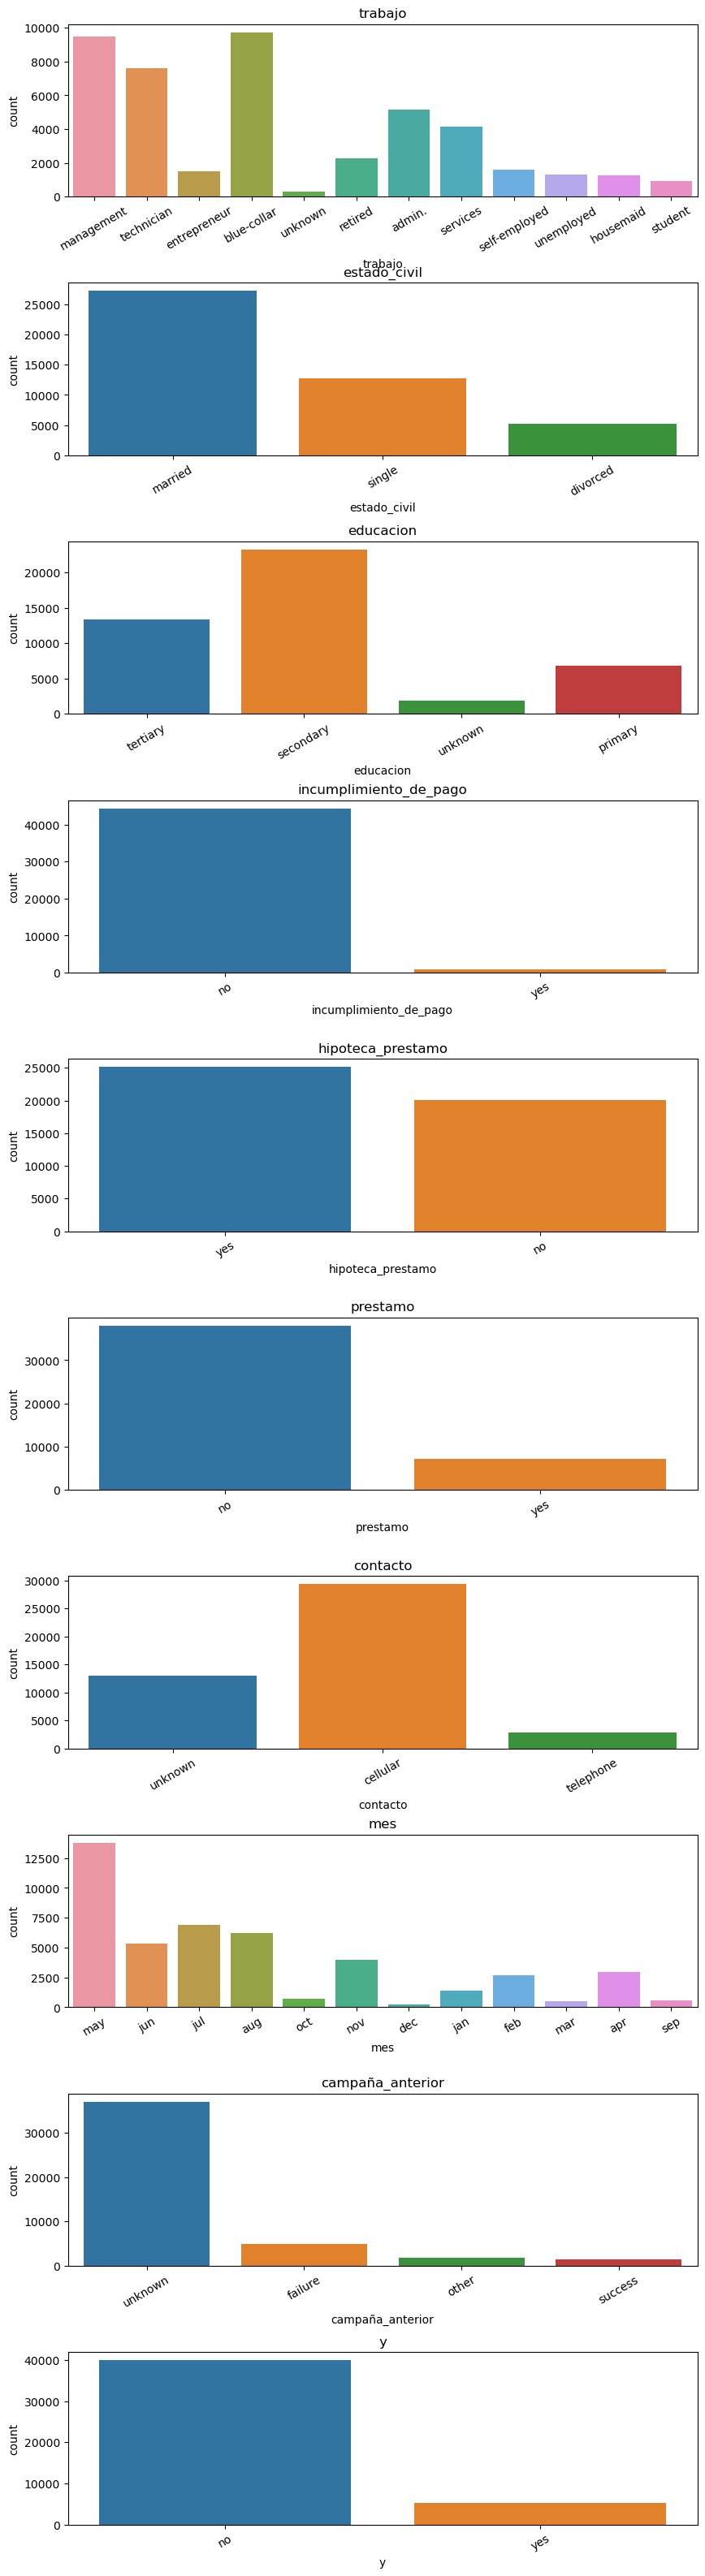

In [5]:
data_desc = ["trabajo","estado_civil","educacion","incumplimiento_de_pago","hipoteca_prestamo","prestamo",
             "contacto","mes","campaña_anterior","y"]

fig, ax = plt.subplots(nrows=len(data_desc),ncols=1,figsize=(10,40))
fig.subplots_adjust(hspace=0.5)

for i, col in enumerate(data_desc):
    sns.countplot(x=col , data=data , ax=ax[i])
    ax[i].set_title(col)
    ax[i].set_xticklabels(ax[i].get_xticklabels(),rotation=30)

* ## OBSERVACIÓN


* **Trabajo** = Contiene el data set 12 tipos de trabajo, los que mas se destacan son 3 (management,technician y blue-collar).
* **Estado civil** = Contiene los 3 tipos de estado civil (casado/a , soltero/a , divorciado/a).
* **Educación** = Tenemos 4 tipos de educación. (terciario,secundaria,primaria y desconocida) el que se destaca mas es secundaria y luego terciaria.
* **Incumplimiento de pago** = Tenemos SI y NO (predomina por una unimidad el "NO".
* **Hipoteca prestamos** = Tenemos también SI y NO (tenemos una igualdad).
* **Prestamo** = Tenemos también entre SI y NO (es mucho mayor el NO).
* **Contacto** = Como se lo contacto al usuario (telefono, celular y desconocido).
* **Mes en cual fue contacado** =  el mes en el cual los usuarios fueron contacados es en MAYO.
* **Campaña anterior** = Como fue la campaña anterior ( desconocido, fallida , otra , exitosa).
* **"Y"** = Si adiquirio el prestamo o no. La mayoria no lo tomo. Luego veremos que porcentaje es.

----

---
* # Exploramos los datos numericos y graficamos

In [6]:
data.describe()

,edad,saldo_actual,dia,duracion_ult_llamada,campaña,dias_ult_contacto,contacto_previo
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


* ## OBSERVACIÓN

* **EDAD** = La edad media que tenemos es de 41 años 
* **Saldo actual de los usuarios** = La mnedia de los sueldo en los usuarios es de 1362
* **DIA** = Dia de contacto medio es el 15
* **Duracion de la ultima llamada con el usuario** = La media de la ultima llamada u contacto con el usuario es de 258 Seg
* **CAMPAÑA** = La media Resultado de la campaña actual es de 2,7
* **Dias sobre el ultimo concato con el usuario** = la media de dias sobre su ultimo contacto con el usuario es de 40
* **Contacto previo a la campaña acutal** = La media de cuantas veces el usuariop fue contacato por la campaña actual es de 0.5
----

* ## Graficamos para que se entienda mejor como se comportan los datos numericos

<AxesSubplot:xlabel='contacto_previo', ylabel='Count'>

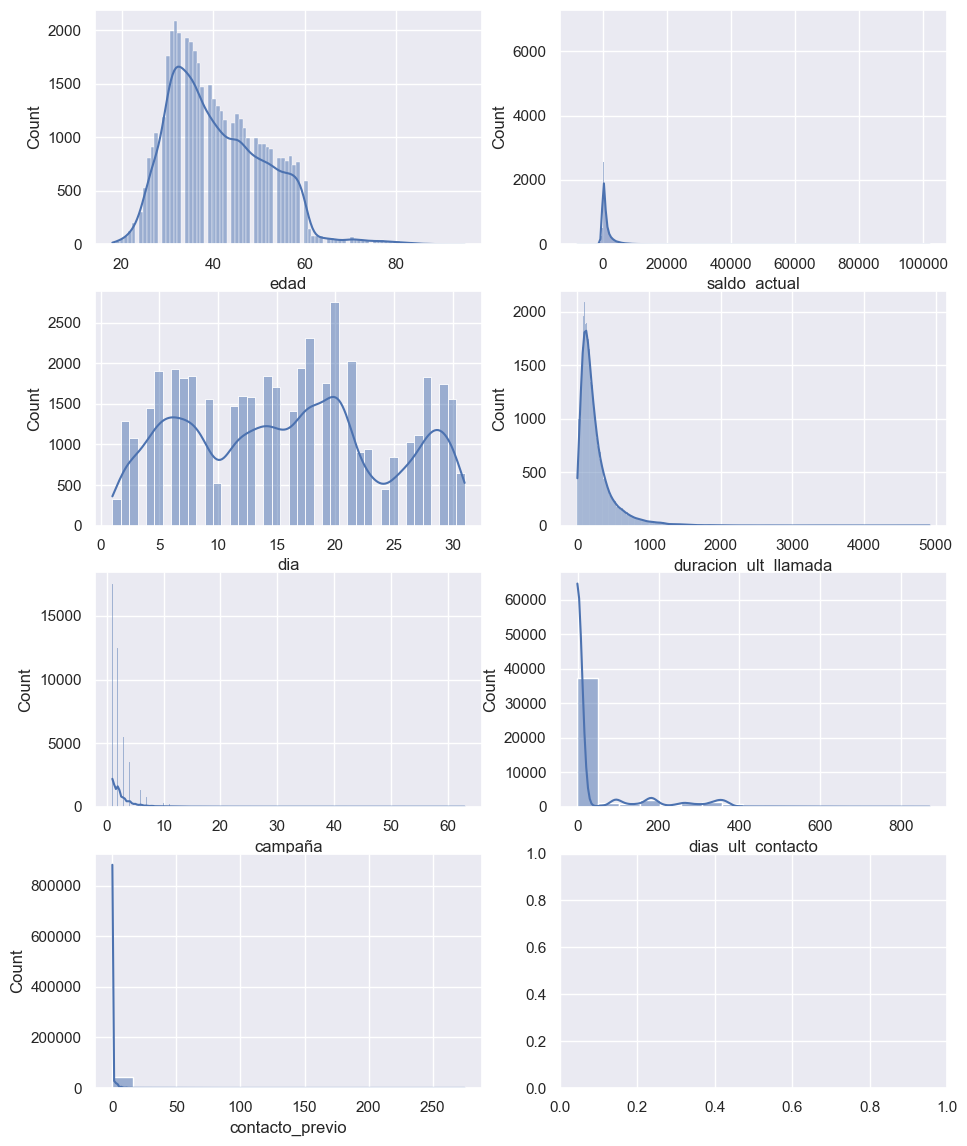

In [15]:
### Creamos una serie de subplots para graficarlo uno por uno

fig,ax = plt.subplots(4,2,figsize=(11,14))
sns.set(font_scale =1)
sns.histplot(data['edad'],kde=True,ax=ax[0,0])
sns.histplot(data['saldo_actual'],kde=True,ax=ax[0,1])
sns.histplot(data['dia'],kde=True,ax=ax[1,0])
sns.histplot(data['duracion_ult_llamada'],kde=True,ax=ax[1,1])
sns.histplot(data['campaña'],kde=True,ax=ax[2,0])
sns.histplot(data['dias_ult_contacto'],kde=True,ax=ax[2,1])
sns.histplot(data['contacto_previo'],kde=True,ax=ax[3,0])

In [16]:
#### Veremos si el data set contiene algunos que otros datos N/A
print(data.isna().sum())
### que nos diga cuantas filas y columnas componen el dataset
print(f"Numeros de filas{data.shape}columnas")

edad                      0
trabajo                   0
estado_civil              0
educacion                 0
incumplimiento_de_pago    0
saldo_actual              0
hipoteca_prestamo         0
prestamo                  0
contacto                  0
dia                       0
mes                       0
duracion_ult_llamada      0
campaña                   0
dias_ult_contacto         0
contacto_previo           0
campaña_anterior          0
y                         0
dtype: int64
Numeros de filas(45211, 17)columnas


----
* ## Seguimos con el análisis de los datos numericos viendos su "CORRELACIÓN"

C:\Users\Acer\AppData\Local\Temp\ipykernel_13144\1902140060.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlacion = data.corr()


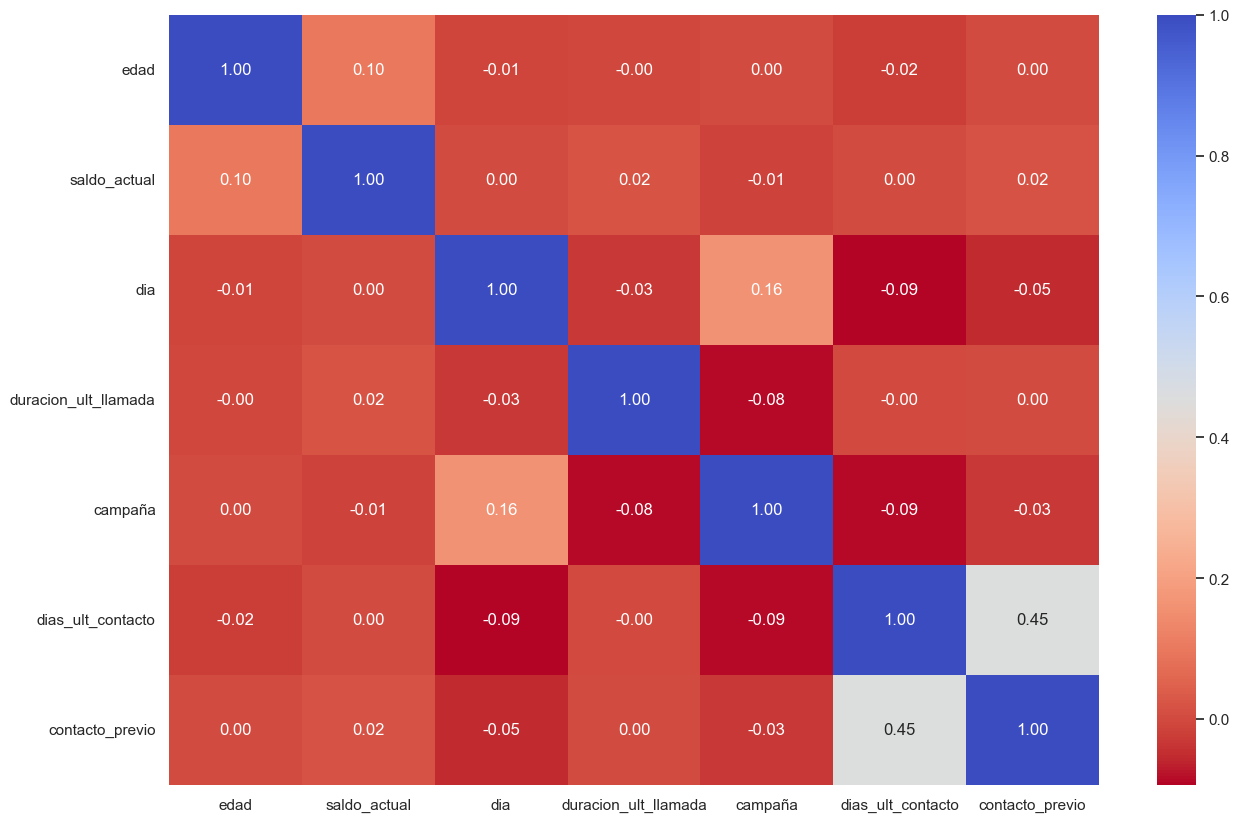

In [17]:
correlacion = data.corr()
plt.figure(figsize=(15,10))
sns.heatmap(correlacion, annot=True , fmt=".2f" , cmap=plt.cm.coolwarm_r)
plt.show()

* ### Se observa que entre los numeros tenemos todas correlaciones muy bajas o negativas. La unica positiva y medianamente buena es la columna del "Contacto previo" y "Dias de el ultimo contacto".
----

* ### Pasaremos a numerico el valor de "Y" (si adiquirio el producto o no)

In [19]:
dic = {"yes":1 , "no":0}
binario = data["y"].map(dic)
data["y_bin"] = binario

------
* # Como por ultimo del análisis general y exploratorio antes de las predicciones. Veremos y análisaremos si existe alguna relación entre las posibles variables predictoras. (Que es lo que mas influyo y si tiene alguna diferencia de cuando el usuario adquirio o no el producto)

In [32]:
col_num = ["edad","saldo_actual","dia","duracion_ult_llamada","campaña","dias_ult_contacto","contacto_previo"]
num_cols = len(col_num)

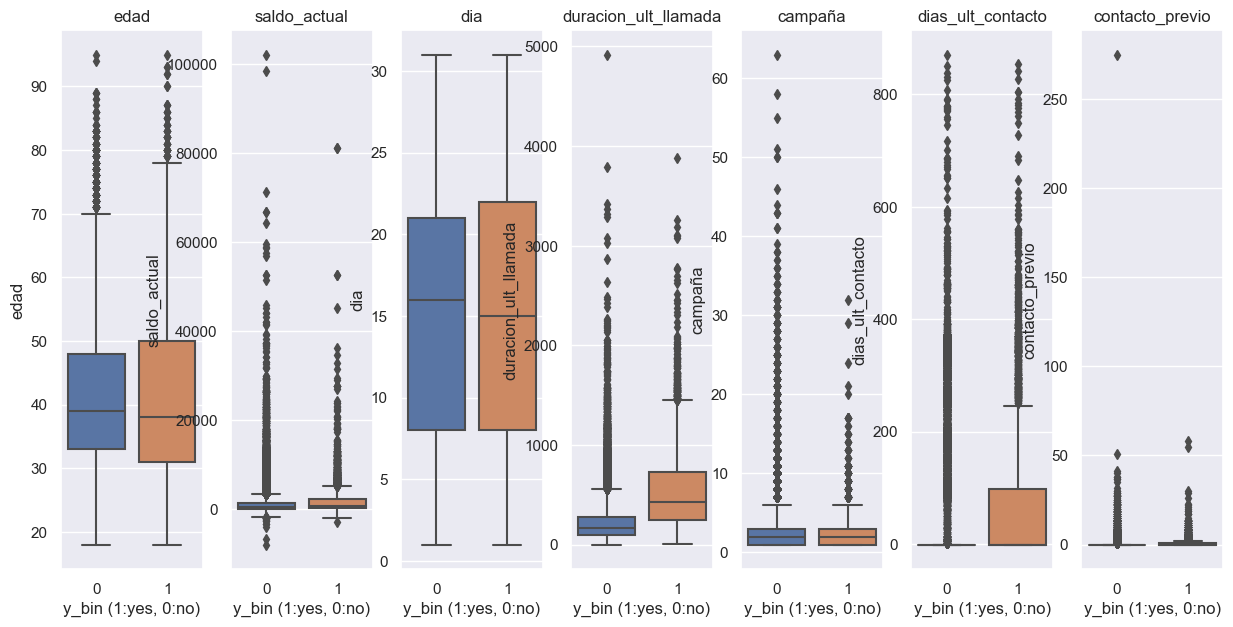

In [42]:
fig,ax= plt.subplots(nrows=1, ncols=7, figsize=(15,7))
fig.subplots_adjust(hspace=.35)

for i, col in enumerate (col_num):
    bplt = sns.boxplot(x="y_bin",y=col,data=data, ax=ax[i])
    ax[i].set_xlabel("y_bin (1:yes, 0:no)")
    ax[i].set_title(col)

* ## Observación


* En los rangos de **EDAD** es casi muy similar.
* En el **SALDO ACTUAL** y el **DIA** es el mismo caso que en la edad. Son similares
* **DURACION DE ULT LLAMADA** hay unos leves minutos de diferencia con los que si aceptaron el producto y no.
* **CAMPAÑA** Es similar en ambos aspecto, tanto en si como no
* **DIAS DEL ULT CONTACTO CON USUARIOS** hay diferencia bastante grande con los usuarios que si adquirieron el producto con los que no.

* **CONTACTO PREVIO** es similar en ambos aspectos

---

* # CONTINUAMOS CON LAS COMPARACIONES Y LAS RELACIONES CON LOS USUARIOS QUE ADQUIRIERON EL PRODUCTO Y NO.